<a href="https://colab.research.google.com/github/ZScyan/CobraLab/blob/main/biomat/Regulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

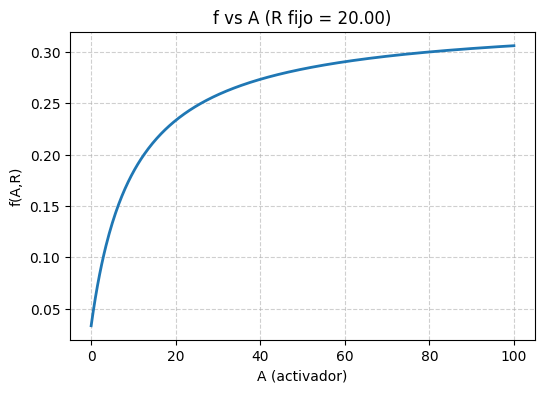

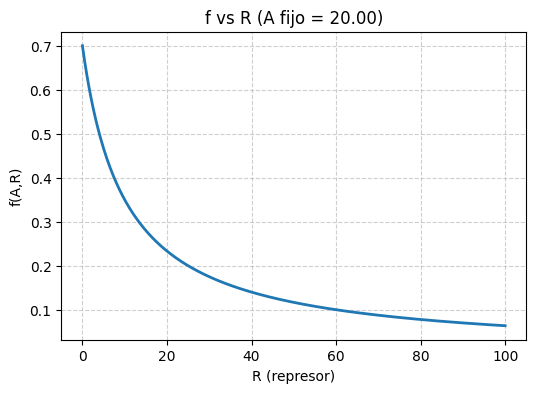

In [1]:
# Modelo Activador + Represor (sitios independientes) — código mínimo
# f(A,R) = (beta0 + betaA*(A/KA)) / (1 + A/KA + R/KR + (A/KA)*(R/KR))

import numpy as np
import matplotlib.pyplot as plt

# ======== Parámetros que el alumno puede editar ========
A = 20.0      # Activador (valor para el corte f vs A usa R fijo)
R = 20.0      # Represor  (valor para el corte f vs R usa A fijo)
KA = 10.0     # Constante de disociación del activador
KR = 10.0     # Constante de disociación del represor
beta0 = 0.10  # Tasa basal
betaA = 1.00  # Incremento máximo por activación (sin represor)

A_max = 100.0   # Rango máximo para barrer A en la gráfica
R_max = 100.0   # Rango máximo para barrer R en la gráfica
n_points = 400  # Resolución de las curvas
# =======================================================

def f_AR(A_val, R_val, KA, KR, beta0, betaA):
    a = A_val / KA
    r = R_val / KR
    Z = 1.0 + a + r + a*r
    return (beta0 + betaA * a) / Z

# Curva f vs A con R fijo
A_grid = np.linspace(0.0, A_max, n_points)
f_vs_A = f_AR(A_grid, R, KA, KR, beta0, betaA)

# Curva f vs R con A fijo
R_grid = np.linspace(0.0, R_max, n_points)
f_vs_R = f_AR(A, R_grid, KA, KR, beta0, betaA)

# === Plots ===
plt.figure(figsize=(6,4))
plt.plot(A_grid, f_vs_A, linewidth=2)
plt.xlabel("A (activador)")
plt.ylabel("f(A,R)")
plt.title(f"f vs A (R fijo = {R:.2f})")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(R_grid, f_vs_R, linewidth=2)
plt.xlabel("R (represor)")
plt.ylabel("f(A,R)")
plt.title(f"f vs R (A fijo = {A:.2f})")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


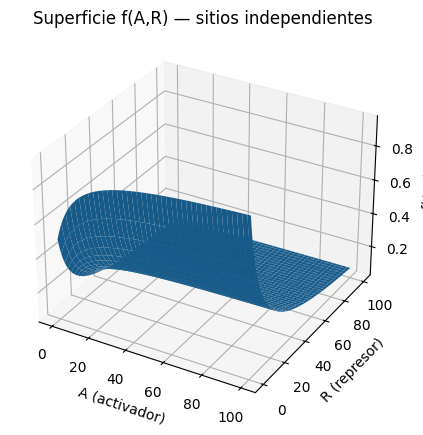

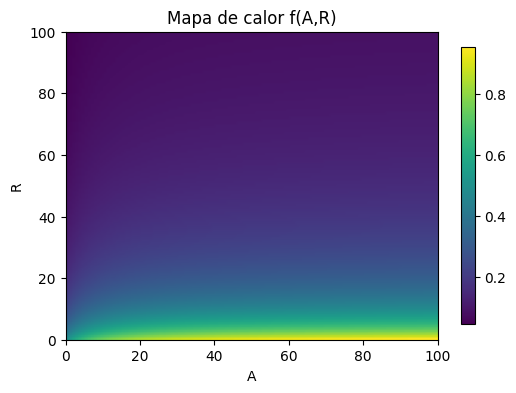

In [3]:
# Modelo Activador + Represor (sitios independientes) — Superficie 3D y Heatmap
# f(A,R) = (beta0 + betaA*(A/KA)) / (1 + A/KA + R/KR + (A/KA)*(R/KR))

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D

# ======== Parámetros editables ========
KA = 10.0     # K_A
KR = 10.0     # K_R
beta0 = 0.50  # tasa basal
betaA = 1.00  # incremento máximo por activación

A_max = 100.0   # rango de A para la malla
R_max = 100.0   # rango de R para la malla
n_points = 120  # resolución de la malla (ajusta si va lento/rápido)
# ======================================

def f_AR(A_val, R_val, KA, KR, beta0, betaA):
    a = A_val / KA
    r = R_val / KR
    Z = 1.0 + a + r + a*r
    return (beta0 + betaA * a) / Z

# Malla A–R
A = np.linspace(0.0, A_max, n_points)
R = np.linspace(0.0, R_max, n_points)
AA, RR = np.meshgrid(A, R, indexing="xy")
F = f_AR(AA, RR, KA, KR, beta0, betaA)

# --- Superficie 3D ---
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(AA, RR, F, linewidth=0, antialiased=True)
ax.set_xlabel("A (activador)")
ax.set_ylabel("R (represor)")
ax.set_zlabel("f(A,R)")
ax.set_title("Superficie f(A,R) — sitios independientes")
plt.show()

# --- Heatmap 2D ---
plt.figure(figsize=(6,4))
im = plt.imshow(F, origin="lower", extent=[0, A_max, 0, R_max], aspect="auto")
plt.xlabel("A")
plt.ylabel("R")
plt.title("Mapa de calor f(A,R)")
plt.colorbar(im, shrink=0.9)
plt.show()
